In [6]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf
import seaborn as sns

In [7]:
df = pd.read_csv(os.path.join("data/KidneyData.csv"))
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
# Remove outliers in data
df.drop(df[df.pot > 40].index, inplace=True)
df.drop(df[df.bgr > 400].index, inplace=True)
df.drop(df[df.bu > 300].index, inplace=True)
df.drop(df[df.sc > 40].index, inplace=True)
df.drop(columns=["id"], axis=1, inplace=True)

### Correlation Matricies

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


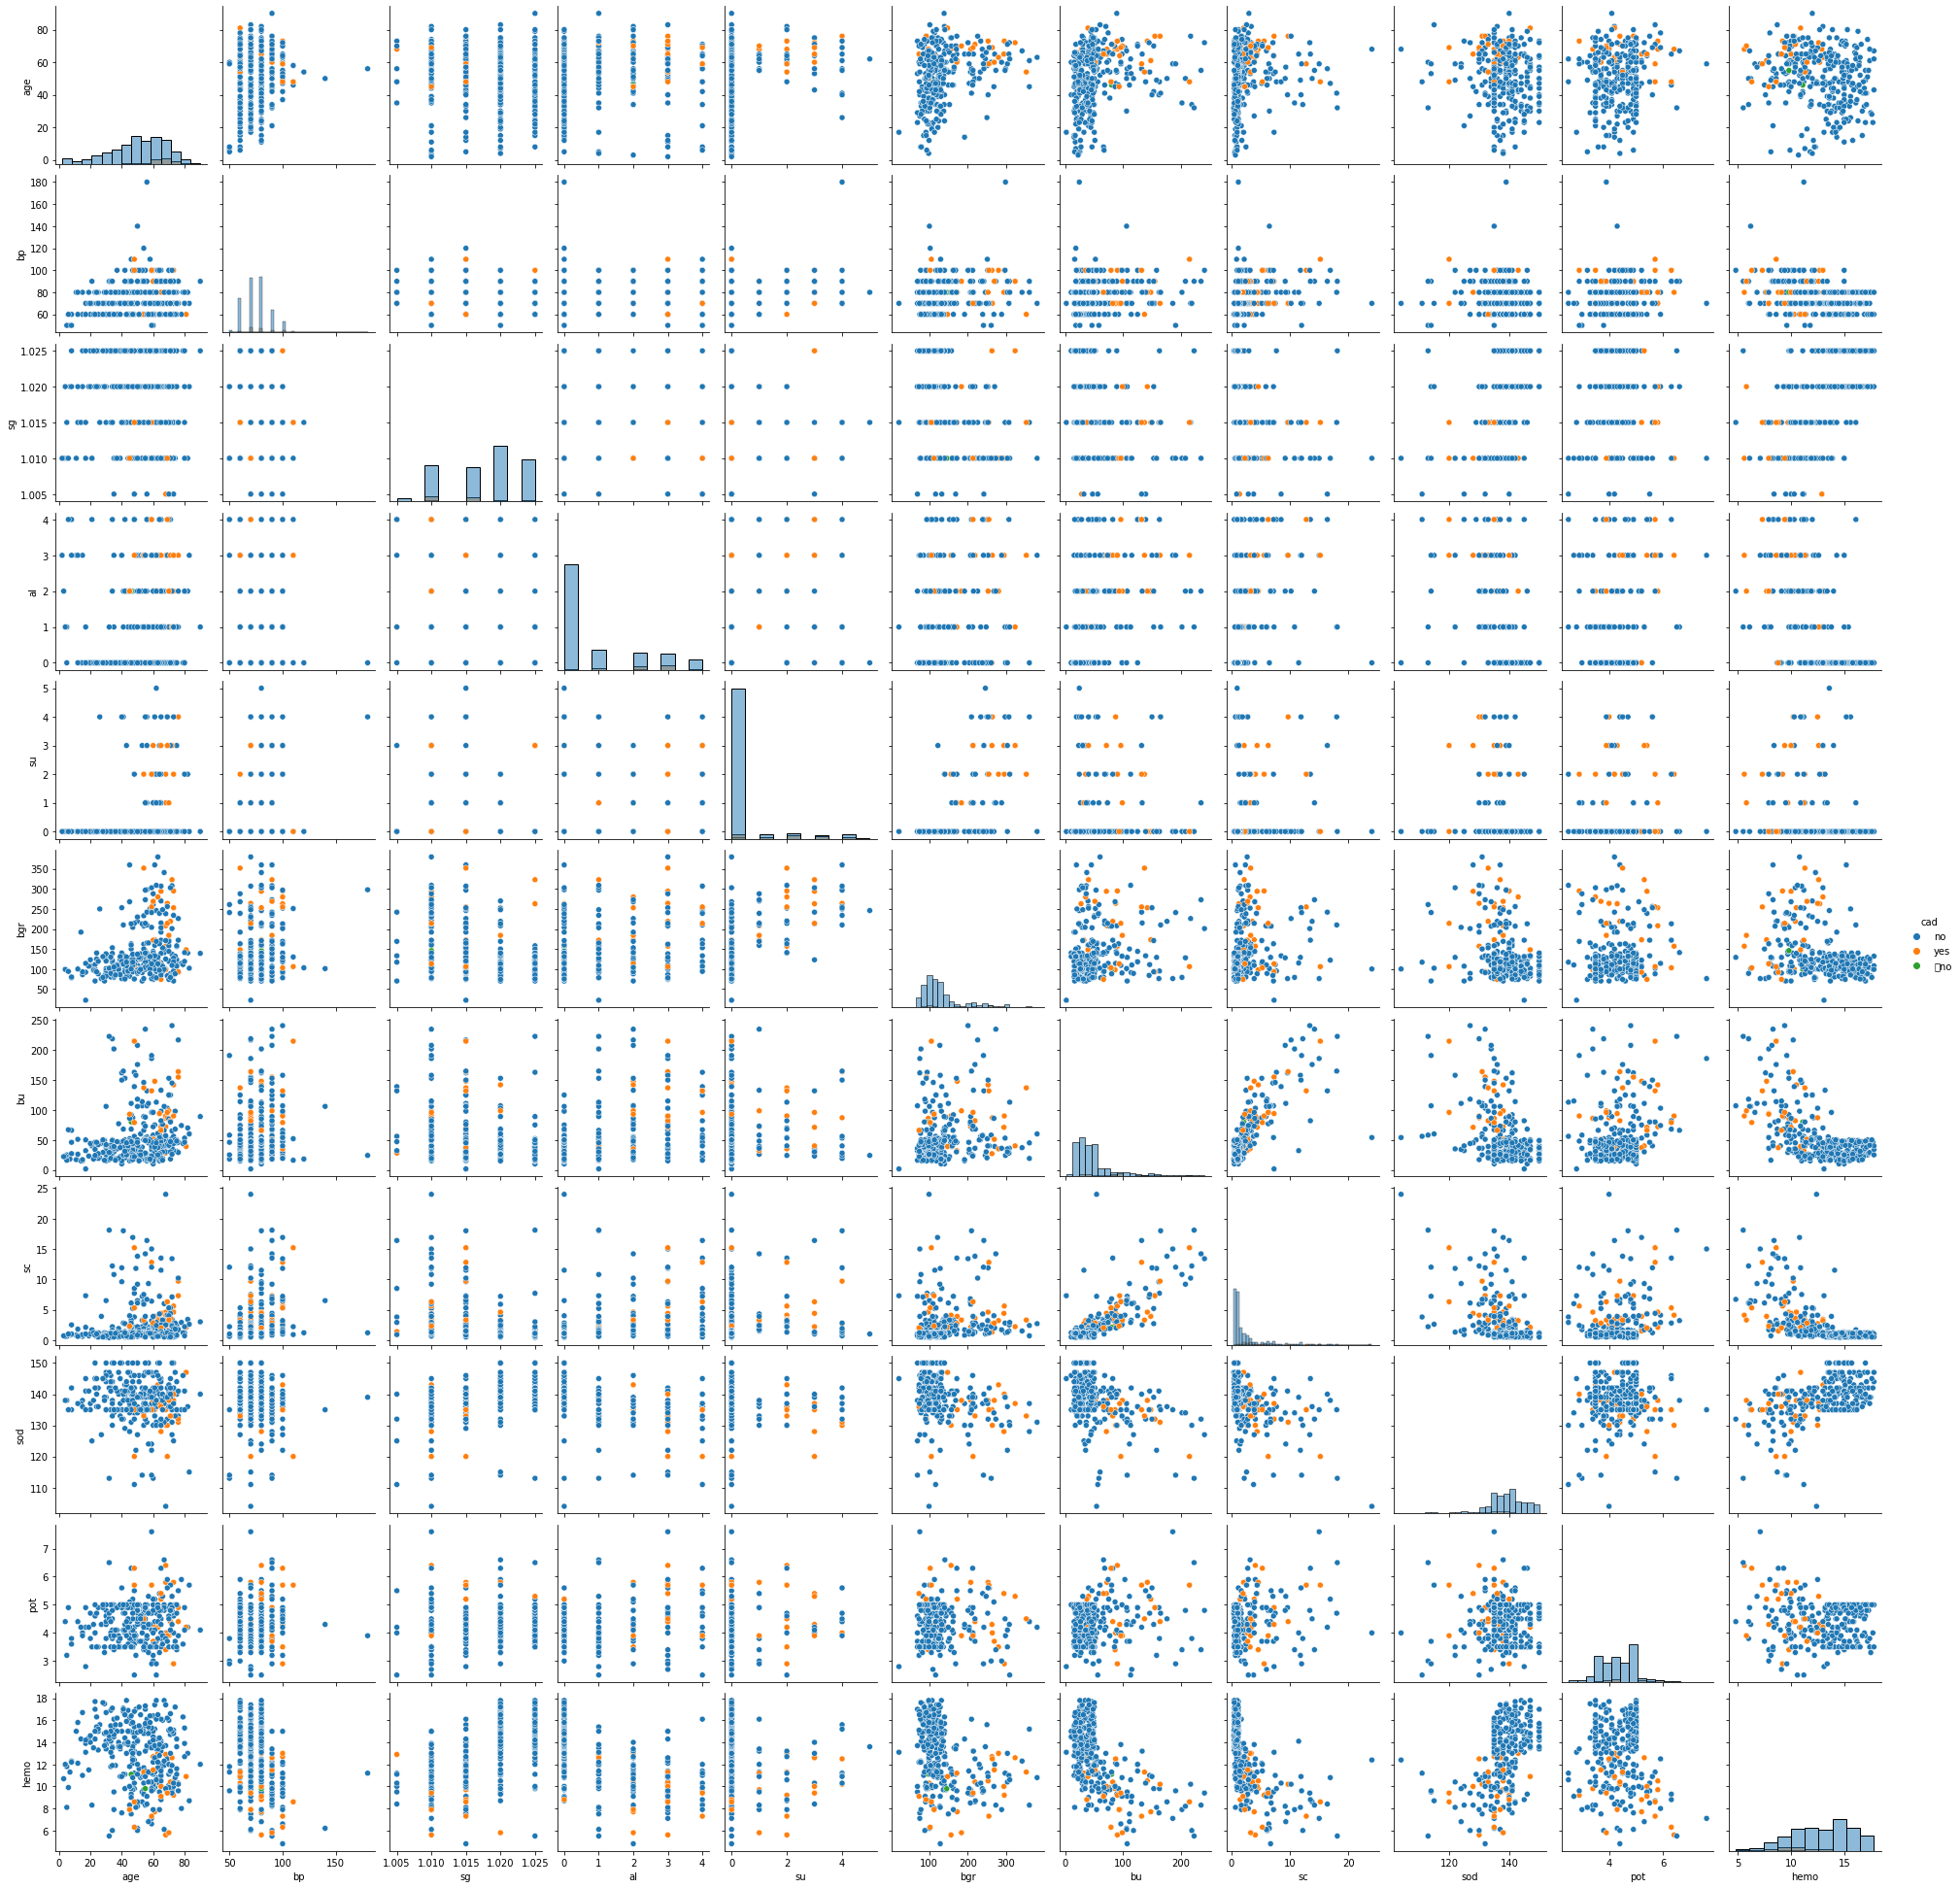

In [10]:
sns.pairplot(df, hue="cad", diag_kind="hist")

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


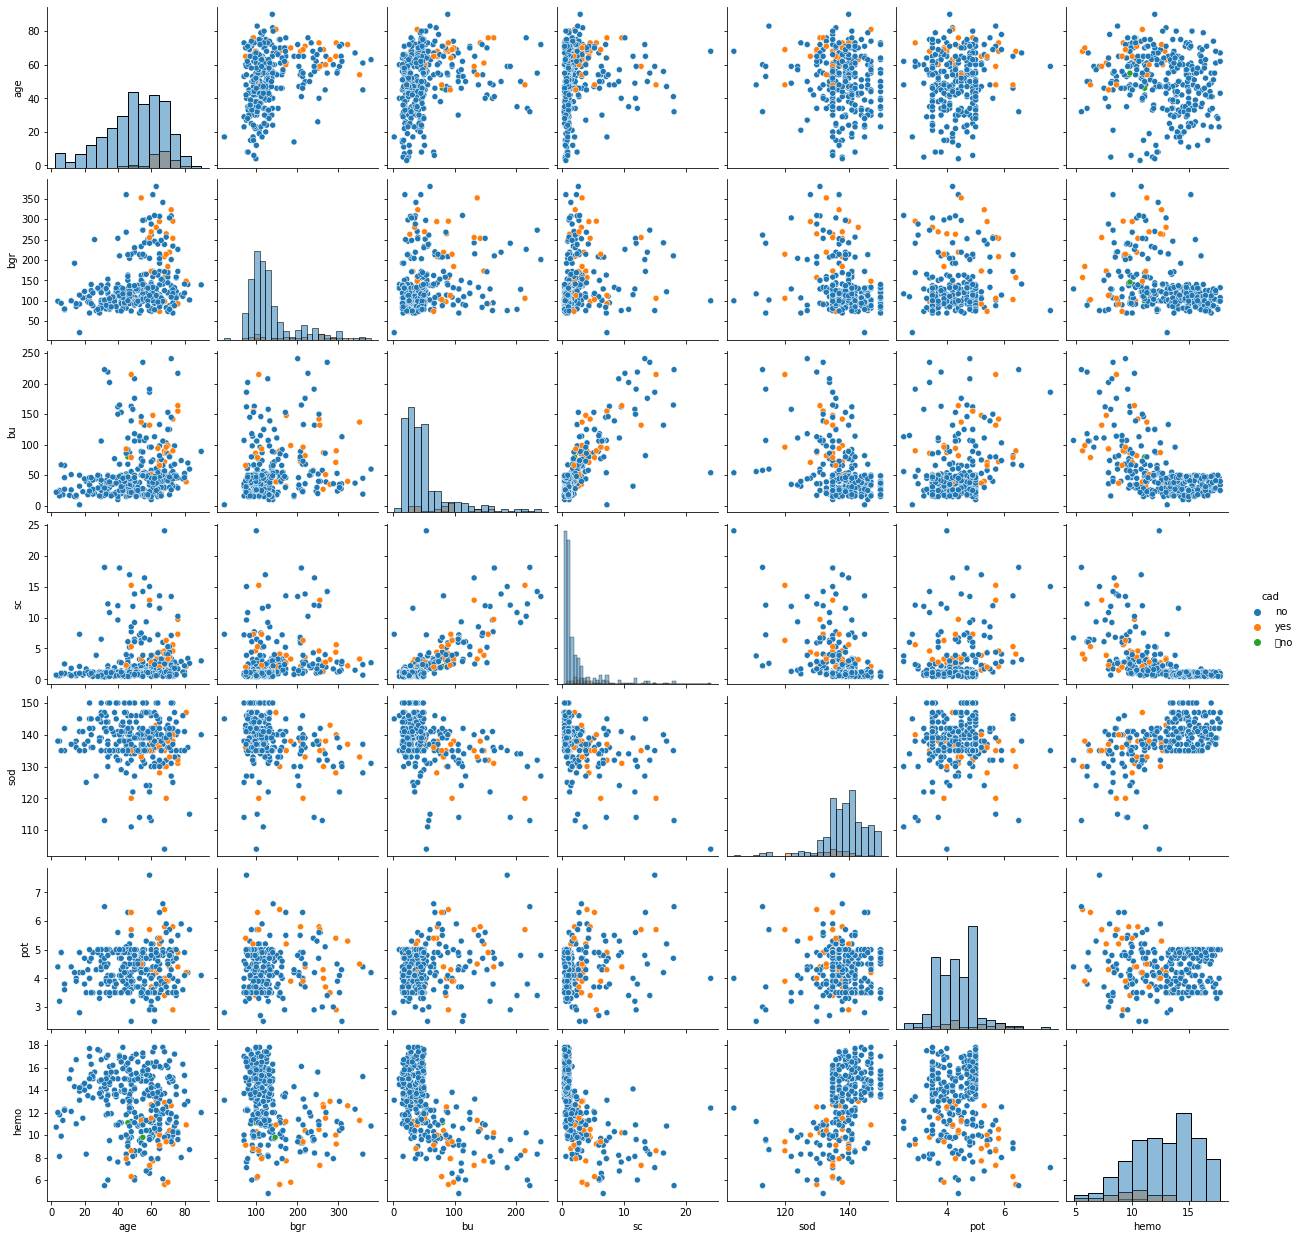

In [11]:
sns.pairplot(df, 
            x_vars=["age", "bgr", "bu", "sc", "sod", "pot", "hemo"],
            y_vars=["age", "bgr", "bu", "sc", "sod", "pot", "hemo"], 
            hue='cad',
            diag_kind="hist")

In [12]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,375.000000,373.000000,340.000000,341.000000,338.000000,342.000000,366.000000,368.000000,303.000000,303.000000,336.000000
mean,51.232000,76.380697,1.017559,0.953079,0.363905,138.997076,54.661749,2.634647,138.049505,4.376568,12.613095
std,17.341244,13.758081,0.005728,1.318700,0.977855,62.410687,43.513259,3.348077,7.027914,0.752707,2.884535
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,104.000000,2.500000,4.800000
25%,41.000000,70.000000,1.013750,0.000000,0.000000,99.000000,26.250000,0.900000,135.000000,3.800000,10.400000
50%,54.000000,80.000000,1.020000,0.000000,0.000000,119.000000,41.000000,1.200000,139.000000,4.400000,13.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,150.000000,65.750000,2.725000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,4.000000,5.000000,380.000000,241.000000,24.000000,150.000000,7.600000,17.800000


C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


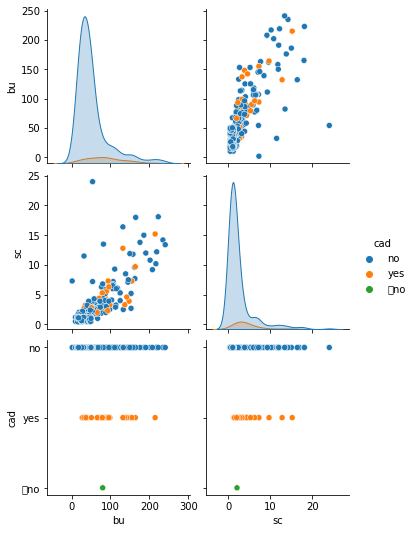

In [13]:
sns.pairplot(
    df,
    x_vars=["bu", "sc"],
    y_vars=["bu", "sc", "cad"], 
    hue="cad"
)

In [14]:
df = df.loc[(df["cad"] == "no") | (df["cad"] == "yes")]
df["cad"].value_counts()

no     350
yes     30
Name: cad, dtype: int64

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


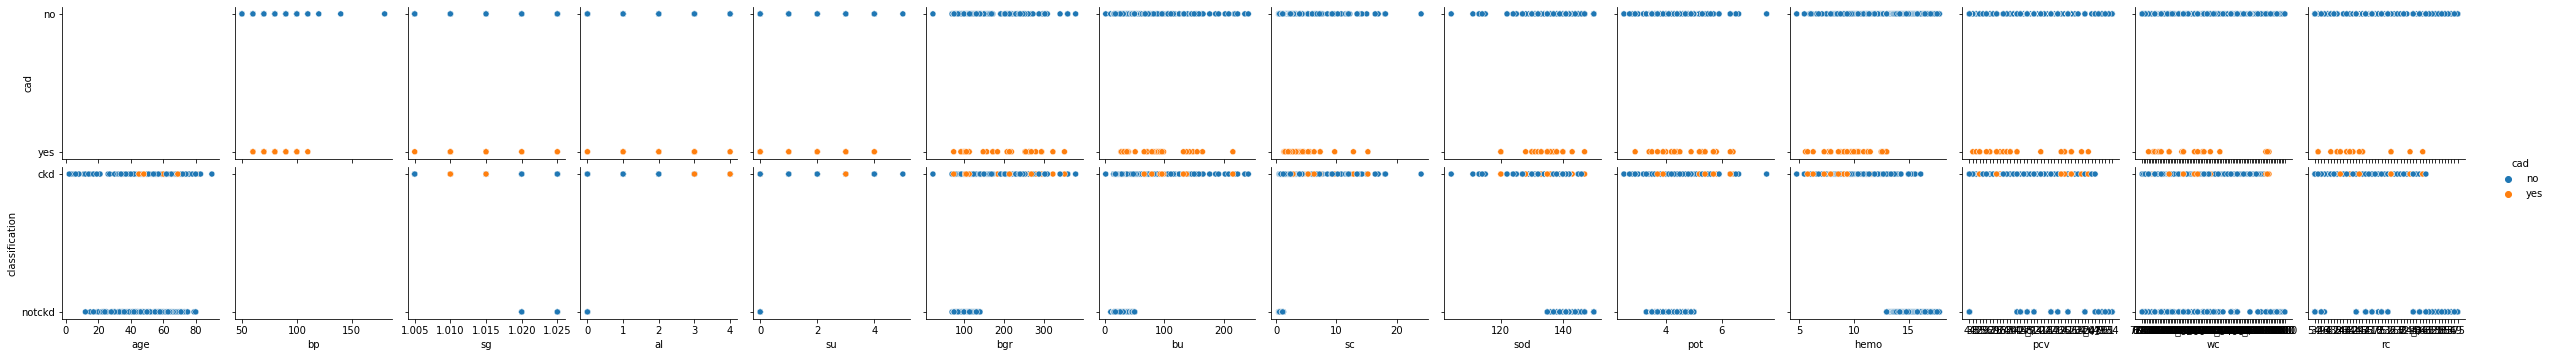

In [15]:
sns.pairplot(
    df,
    x_vars=['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
    y_vars=['cad', 'classification'],
    hue="cad"
)

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


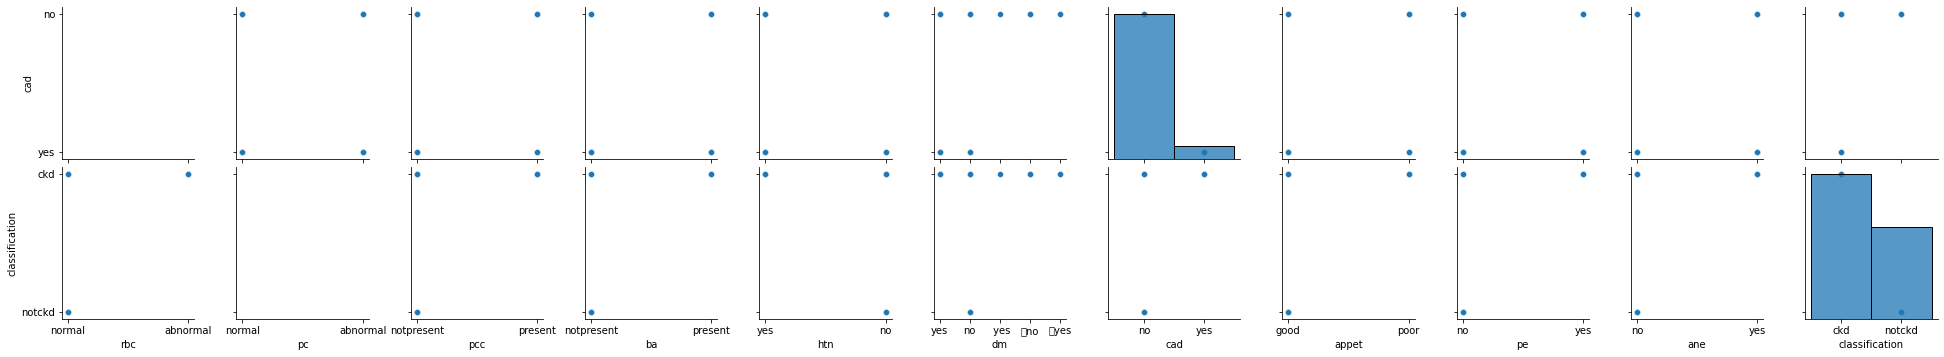

In [16]:
sns.pairplot(
    df,
    x_vars=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
    y_vars=['cad', 'classification'],
)

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


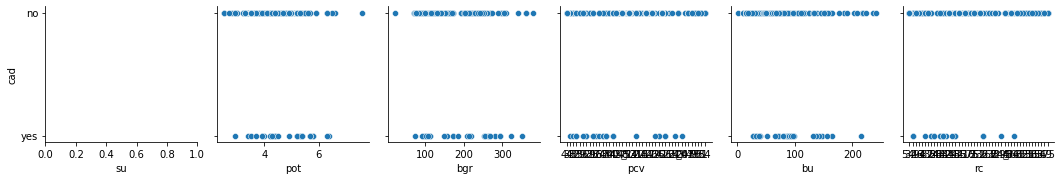

In [17]:
sns.pairplot(
    df,
    x_vars=['su', 'pot', 'bgr', 'pcv', 'bu', 'rc'],
    y_vars=['cad'],
)

# Preprocessing of Data

### Choose data series for analysis

In [18]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [19]:
reduced_df = df[['bp', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'classification']]
reduced_df.head()

,bp,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,classification
0,80.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,ckd
1,50.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,ckd
3,70.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,ckd
4,80.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,ckd
5,90.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,ckd


In [20]:
reduced_df.dropna(how='any', inplace=True)
reduced_df

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bp,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,classification
3,70.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,ckd
5,90.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,ckd
9,90.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,ckd
11,70.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,yes,yes,no,ckd
12,70.0,1.0,208.0,72.0,2.1,138.0,5.8,9.7,28,12200,3.4,yes,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,notckd
396,70.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,notckd
397,80.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,notckd
398,60.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,notckd


In [21]:
# Count how many "yes" and "no" values are present for the Coronary Artery Disease categorical variable
reduced_df["cad"].value_counts()

no     183
yes     15
Name: cad, dtype: int64

In [22]:
# Assign y as target
target = reduced_df["cad"].copy()

target_names = ["negative", "positive"]

In [23]:
# Drop y variable and encode bindary data
kidney_data = reduced_df.drop(columns=["cad"], axis=1)

data1 = kidney_data.copy()

data_binary_encoded1 = pd.get_dummies(data1, columns=["htn", "dm", "classification"])

data_binary_encoded1.head()

,bp,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn_no,htn_yes,dm_no,dm_yes,classification_ckd,classification_notckd
3,70.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,0,1,1,0,1,0
5,90.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,0,1,0,1,1,0
9,90.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,0,1,0,1,1,0
11,70.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,0,1,0,1,1,0
12,70.0,1.0,208.0,72.0,2.1,138.0,5.8,9.7,28,12200,3.4,0,1,0,1,1,0


In [24]:
# Drop redundancies and assign X values as kidney_bindary_data
kidney_binary_data = data_binary_encoded1.drop(columns=['htn_yes', 'dm_no', 'classification_notckd'])
kidney_binary_data.columns

feature_names = kidney_binary_data.columns

kidney_binary_data.describe()

,bp,su,bgr,bu,sc,sod,pot,hemo,htn_no,dm_yes,classification_ckd
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,75.252525,0.292929,132.510101,51.434343,2.199495,138.873737,4.334343,13.383838,0.722222,0.242424,0.383838
std,13.655919,0.852021,61.987123,41.944527,2.876078,6.836689,0.751940,2.753335,0.449039,0.429636,0.487552
min,50.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,5.600000,0.000000,0.000000,0.000000
25%,70.000000,0.000000,95.250000,26.000000,0.725000,135.000000,3.700000,11.225000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,114.500000,39.500000,1.100000,139.000000,4.400000,13.900000,1.000000,0.000000,0.000000
75%,80.000000,0.000000,133.000000,50.000000,2.075000,142.750000,4.900000,15.500000,1.000000,0.000000,1.000000
max,180.000000,4.000000,380.000000,235.000000,15.200000,150.000000,7.600000,17.800000,1.000000,1.000000,1.000000


### Split Data into Train and Test Data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(kidney_binary_data, target, random_state=630, stratify=target)

In [26]:
# Compare sample sizes for train and test to ensure "yes" values are distributed appropriately
print(y_test.value_counts())
y_train.value_counts()

no     46
yes     4
Name: cad, dtype: int64


no     137
yes     11
Name: cad, dtype: int64

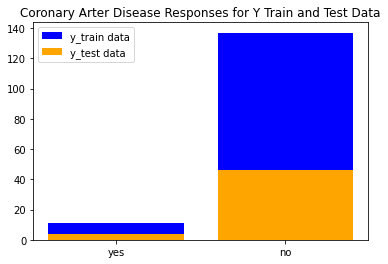

In [27]:
# Plot y data to show yes/no for test train split
labels = ['yes', 'no']
y = [15, 183]
y_trained = [11, 137]
y_tested = [4, 46]

# width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

# ax.bar(labels, y, width, label='Target Dataset')

ax.bar(labels, y_trained, label='y_train data', color='blue')
ax.bar(labels, y_tested, label='y_test data', color='orange')

# ax.set_ylabel('Scores')
ax.set_title('Coronary Arter Disease Responses for Y Train and Test Data')
ax.legend()

plt.show()

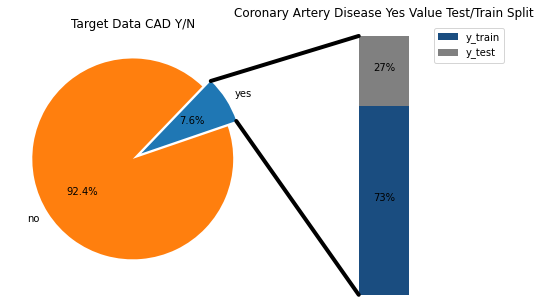

In [28]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [7.58, 92.42]
labels = ['yes', 'no']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -45 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)
ax1.set_title('Target Data CAD Y/N')
# bar chart parameters

xpos = 0
bottom = 0
ratios = [.73, .27]
labels = ['y_train', 'y_test']
width = .2
colors = [[.1, .3, .5], [.5, .5, .5]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Coronary Artery Disease Yes Value Test/Train Split')
ax2.legend(('y_train', 'y_test'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

# Decision Tree:

In [29]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
DTA = round(clf.score(X_test, y_test)*100, 2)
DTA

86.0

Decision Tree Confusion matrix, without normalization
[[42  4]
 [ 3  1]]
Decision Tree Normalized confusion matrix
[[0.91 0.09]
 [0.75 0.25]]


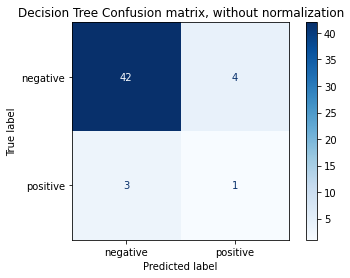

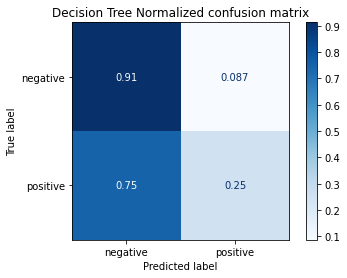

In [30]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Decision Tree Confusion matrix, without normalization", None),
                  ("Decision Tree Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Random Forest:

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
RFA = round(rf.score(X_test, y_test)*100, 2)
RFA

90.0

In [32]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.13634739054348877, 'pot'),
 (0.1342666135234896, 'bgr'),
 (0.12253254324539828, 'su'),
 (0.08057723068829144, 'hemo'),
 (0.0799708081817678, 'bu'),
 (0.07815774033776339, 'pcv'),
 (0.07809655576108165, 'rc'),
 (0.06443016293943053, 'sc'),
 (0.05972726016780144, 'bp'),
 (0.05949377768554355, 'wc'),
 (0.05691136595152161, 'sod'),
 (0.03525074136757002, 'htn_no'),
 (0.012428539468009595, 'dm_yes'),
 (0.0018092701388424325, 'classification_ckd')]

Random Forrest Confusion matrix, without normalization
[[45  1]
 [ 4  0]]
Random Forrest Normalized confusion matrix
[[0.98 0.02]
 [1.   0.  ]]


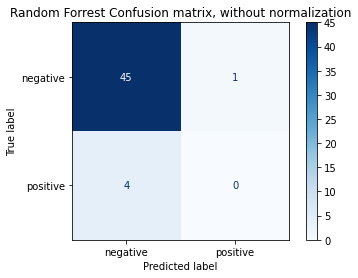

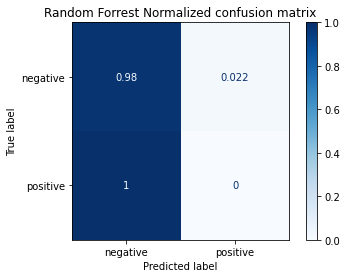

In [33]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Random Forrest Confusion matrix, without normalization", None),
                  ("Random Forrest Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [35]:
classifier.fit(X_train, y_train)

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [36]:
LRA = round((classifier.score(X_test, y_test) * 100),2)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
LRA

Training Data Score: 0.9324324324324325
Testing Data Score: 0.92


92.0

In [37]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
First 10 Actual labels: ['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']


In [38]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
5,no,yes
6,no,no
7,no,no
8,no,no
9,no,no


Logistic Regression Confusion matrix, without normalization
[[45  1]
 [ 3  1]]
Logistic Regression Normalized confusion matrix
[[0.98 0.02]
 [0.75 0.25]]


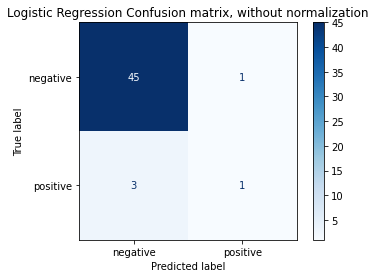

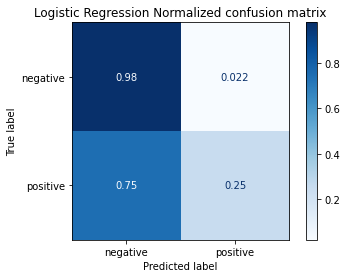

In [39]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Logistic Regression Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# SVC

In [40]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)
svc = model.fit(X_train, y_train)

In [41]:
print('Test Acc: %.3f' % model.score(X_test, y_test))
SVMA = round((svc.score(X_test, y_test) * 100),2)
SVMA

Test Acc: 0.940


94.0

In [42]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.96      0.98      0.97        46
    positive       0.67      0.50      0.57         4

    accuracy                           0.94        50
   macro avg       0.81      0.74      0.77        50
weighted avg       0.93      0.94      0.94        50



Support Vector Machine Confusion matrix, without normalization
[[45  1]
 [ 2  2]]
Support Vector Machine Normalized confusion matrix
[[0.98 0.02]
 [0.5  0.5 ]]


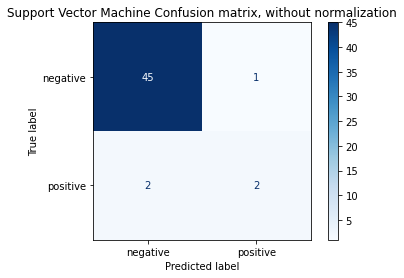

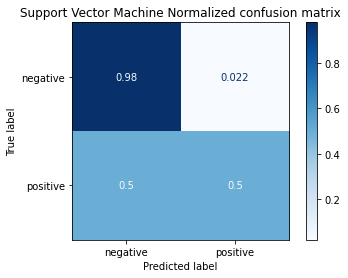

In [43]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Support Vector Machine Confusion matrix, without normalization", None),
                  ("Support Vector Machine Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# One-Hot Encoding

In [44]:
# data = df["cad"].copy()

y_train_binary_encoded = pd.get_dummies(y_train)
y_test_binary_encoded = pd.get_dummies(y_test)
y_train_binary_encoded.head()

,no,yes
333,1,0
108,1,0
171,1,0
394,1,0
354,1,0


In [45]:
y_train_binary = y_train_binary_encoded.drop(columns="yes")
y_test_binary = y_test_binary_encoded.drop(columns="yes")

In [46]:
y_train_binary

,no
333,1
108,1
171,1
394,1
354,1
...,...
48,1
133,1
307,1
284,1


In [47]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train_binary)
y_test_categorical = to_categorical(y_test_binary)
y_train_categorical

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [48]:
# from tensorflow.keras.utils import to_categorical

# y_train_categorical = to_categorical(y_train)
# y_test_categorical = to_categorical(y_test)
# y_train_categorical

# Scaling the Data:

In [49]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [50]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbor

In [51]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.920
k: 3, Train/Test Score: 0.959/0.920
k: 5, Train/Test Score: 0.946/0.920
k: 7, Train/Test Score: 0.926/0.920
k: 9, Train/Test Score: 0.953/0.920
k: 11, Train/Test Score: 0.926/0.900
k: 13, Train/Test Score: 0.926/0.920
k: 15, Train/Test Score: 0.926/0.920
k: 17, Train/Test Score: 0.926/0.940
k: 19, Train/Test Score: 0.926/0.920
k: 21, Train/Test Score: 0.926/0.920
k: 23, Train/Test Score: 0.926/0.920
k: 25, Train/Test Score: 0.926/0.920
k: 27, Train/Test Score: 0.926/0.920
k: 29, Train/Test Score: 0.926/0.920


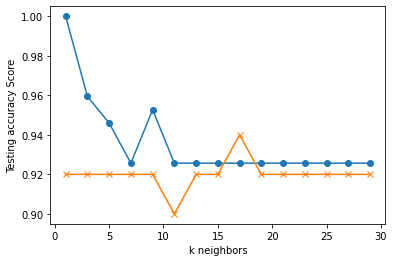

In [52]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [53]:
knn = KNeighborsClassifier(n_neighbors=13)
KNEAR = knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % KNEAR.score(X_test_scaled, y_test))
KNNA = round((knn.score(X_test_scaled, y_test) * 100),2)
KNNA

k=13 Test Acc: 0.920


92.0

K Nearest Neighbor Confusion matrix, without normalization
[[45  1]
 [ 3  1]]
K Nearest Neighbor Normalized confusion matrix
[[0.98 0.02]
 [0.75 0.25]]


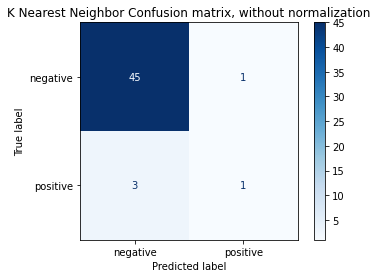

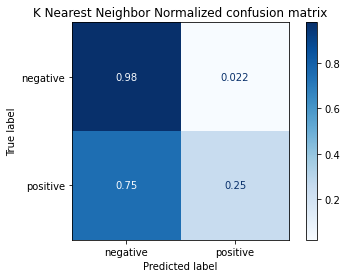

In [54]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("K Nearest Neighbor Confusion matrix, without normalization", None),
                  ("K Nearest Neighbor Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test_scaled, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Neural Network

In [55]:
# from tensorflow.keras.utils import to_categorical

In [56]:
# y_train_categorical = to_categorical(y_train)
# y_test_categorical = to_categorical(y_test)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=48, activation='relu', input_dim=14))
model.add(Dense(units=2, activation='softmax'))

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                720       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 98        
Total params: 818
Trainable params: 818
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
NNA_model = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 148 samples
Epoch 1/100
148/148 - 0s - loss: 1.0792 - accuracy: 0.1216
Epoch 2/100
148/148 - 0s - loss: 0.9189 - accuracy: 0.2027
Epoch 3/100
148/148 - 0s - loss: 0.7827 - accuracy: 0.4257
Epoch 4/100
148/148 - 0s - loss: 0.6694 - accuracy: 0.6081
Epoch 5/100
148/148 - 0s - loss: 0.5755 - accuracy: 0.7635
Epoch 6/100
148/148 - 0s - loss: 0.4996 - accuracy: 0.8378
Epoch 7/100
148/148 - 0s - loss: 0.4404 - accuracy: 0.8716
Epoch 8/100
148/148 - 0s - loss: 0.3925 - accuracy: 0.8784
Epoch 9/100
148/148 - 0s - loss: 0.3547 - accuracy: 0.9122
Epoch 10/100
148/148 - 0s - loss: 0.3252 - accuracy: 0.9257
Epoch 11/100
148/148 - 0s - loss: 0.3008 - accuracy: 0.9257
Epoch 12/100
148/148 - 0s - loss: 0.2819 - accuracy: 0.9324
Epoch 13/100
148/148 - 0s - loss: 0.2659 - accuracy: 0.9324
Epoch 14/100
148/148 - 0s - loss: 0.2525 - accuracy: 0.9324
Epoch 15/100
148/148 - 0s - loss: 0.2417 - accuracy: 0.9324
Epoch 16/100
148/148 - 0s - loss: 0.2313 - accuracy: 0.9324
Epoch 17/100
148/148 - 0s - 

In [61]:
# # evaluate the model
# _, train_acc = model.evaluate(trainX, trainy, verbose=0)
# _, test_acc = model.evaluate(testX, testy, verbose=0)
# Neural Network Acct
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

NNA = round((model_accuracy * 100),2)
NNA

50/50 - 0s - loss: 0.2501 - accuracy: 0.9200
Normal Neural Network - Loss: 0.25009478569030763, Accuracy: 0.9200000166893005


92.0

In [62]:
NNA_predictions = model.predict_classes(X_test_scaled)

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [72]:
NNA_series = pd.Series(NNA_predictions)

In [74]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(NNA_series, y_test_binary)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(NNA_series, y_test_binary)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(NNA_series, y_test_binary)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(NNA_series, y_test_binary)
print('F1 score: %f' % f1)

Accuracy: 0.920000
Precision: 0.978261
Recall: 0.937500
F1 score: 0.957447


### Confusion Matrix for Neural Network

In [75]:
# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(NNA_series, y_test_binary)
print(matrix)

[[ 1  1]
 [ 3 45]]


In [76]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(NNA_series, y_test_binary)
print(matrix)

[[ 1  1]
 [ 3 45]]


# Deep Learning

In [77]:
deep_model = Sequential()
deep_model.add(Dense(units=48, activation='relu', input_dim=14))
deep_model.add(Dense(units=24, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [78]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 148 samples
Epoch 1/100
148/148 - 1s - loss: 0.8857 - accuracy: 0.2973
Epoch 2/100
148/148 - 0s - loss: 0.7162 - accuracy: 0.5878
Epoch 3/100
148/148 - 0s - loss: 0.5937 - accuracy: 0.8243
Epoch 4/100
148/148 - 0s - loss: 0.5015 - accuracy: 0.8919
Epoch 5/100
148/148 - 0s - loss: 0.4321 - accuracy: 0.9257
Epoch 6/100
148/148 - 0s - loss: 0.3791 - accuracy: 0.9257
Epoch 7/100
148/148 - 0s - loss: 0.3357 - accuracy: 0.9189
Epoch 8/100
148/148 - 0s - loss: 0.2964 - accuracy: 0.9257
Epoch 9/100
148/148 - 0s - loss: 0.2632 - accuracy: 0.9257
Epoch 10/100
148/148 - 0s - loss: 0.2342 - accuracy: 0.9324
Epoch 11/100
148/148 - 0s - loss: 0.2112 - accuracy: 0.9392
Epoch 12/100
148/148 - 0s - loss: 0.1923 - accuracy: 0.9392
Epoch 13/100
148/148 - 0s - loss: 0.1771 - accuracy: 0.9324
Epoch 14/100
148/148 - 0s - loss: 0.1642 - accuracy: 0.9392
Epoch 15/100
148/148 - 0s - loss: 0.1541 - accuracy: 0.9392
Epoch 16/100
148/148 - 0s - loss: 0.1455 - accuracy: 0.9459
Epoch 17/100
148/148 - 0s - 

In [79]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

50/50 - 0s - loss: 0.2501 - accuracy: 0.9200
Normal Neural Network - Loss: 0.25009478569030763, Accuracy: 0.9200000166893005


In [80]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

50/50 - 0s - loss: 0.3427 - accuracy: 0.9200
Deep Neural Network - Loss: 0.3427261197566986, Accuracy: 0.9200000166893005


In [81]:
# Deep Learning Acct
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")


DLA = round((model_accuracy * 100),2)
DLA

50/50 - 0s - loss: 0.3427 - accuracy: 0.9200
Deep Neural Network - Loss: 0.3427261197566986, Accuracy: 0.9200000166893005


92.0

# Model Accuracy

In [84]:
KidneyModelAccuracy_df = pd.DataFrame({"ML_Model":["Decision Tree","Random Forrest","Logistical Regression","Support Vector Machine","K Nearest Neighbors","Neural Network","Deep Learning"],
                            "Kidney_Model_Accuracy":[DTA, RFA, LRA, SVMA, KNNA, NNA, DLA]                       
                             })

KidneyModelAccuracy_df

,ML_Model,Kidney_Model_Accuracy
0,Decision Tree,86.0
1,Random Forrest,90.0
2,Logistical Regression,92.0
3,Support Vector Machine,94.0
4,K Nearest Neighbors,92.0
5,Neural Network,92.0
6,Deep Learning,92.0


In [85]:
Accuracy_df = pd.read_csv(os.path.join("data/Heart_Model_Accuracy.csv"))
Accuracy_df

,ML_Model,Accuracy
0,Decision Tree,78.67
1,Random Forrest,85.33
2,Logistical Regression,86.67
3,Support Vector Machine,89.33
4,K Nearest Neighbors,85.33
5,Neural Network,85.33
6,Deep Learning,81.33


In [86]:
Model_Accuracy_df = pd.merge(Accuracy_df, KidneyModelAccuracy_df, on='ML_Model')
Model_Accuracy_df = Model_Accuracy_df.rename(columns={'Accuracy':'Heart_Model_Accuracy'})
Model_Accuracy_df

,ML_Model,Heart_Model_Accuracy,Kidney_Model_Accuracy
0,Decision Tree,78.67,86.0
1,Random Forrest,85.33,90.0
2,Logistical Regression,86.67,92.0
3,Support Vector Machine,89.33,94.0
4,K Nearest Neighbors,85.33,92.0
5,Neural Network,85.33,92.0
6,Deep Learning,81.33,92.0


<AxesSubplot:>

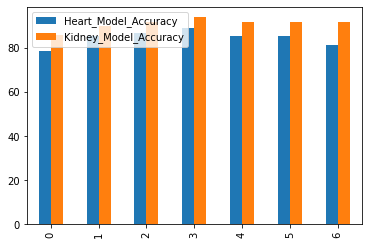

In [87]:
Model_Accuracy_df.plot(kind="bar")

In [88]:
# Model_Accuracy_df.to_csv('data/Heart_Kidney_Model_Accuracy.csv',index=False)

# Linear Regression

In [89]:
X = kidney_binary_data
y_cat = target
y_binary_encoded = pd.get_dummies(y_cat)
y = y_binary_encoded.drop(columns="yes").values.reshape(-1, 1)
print(X.shape, y.shape)
print(X)
print(y)

(198, 14) (198, 1)
       bp   su    bgr     bu   sc    sod  pot  hemo pcv     wc   rc  htn_no  \
3    70.0  0.0  117.0   56.0  3.8  111.0  2.5  11.2  32   6700  3.9       0   
5    90.0  0.0   74.0   25.0  1.1  142.0  3.2  12.2  39   7800  4.4       0   
9    90.0  0.0   70.0  107.0  7.2  114.0  3.7   9.5  29  12100  3.7       0   
11   70.0  0.0  380.0   60.0  2.7  131.0  4.2  10.8  32   4500  3.8       0   
12   70.0  1.0  208.0   72.0  2.1  138.0  5.8   9.7  28  12200  3.4       0   
..    ...  ...    ...    ...  ...    ...  ...   ...  ..    ...  ...     ...   
395  80.0  0.0  140.0   49.0  0.5  150.0  4.9  15.7  47   6700  4.9       1   
396  70.0  0.0   75.0   31.0  1.2  141.0  3.5  16.5  54   7800  6.2       1   
397  80.0  0.0  100.0   26.0  0.6  137.0  4.4  15.8  49   6600  5.4       1   
398  60.0  0.0  114.0   50.0  1.0  135.0  4.9  14.2  51   7200  5.9       1   
399  80.0  0.0  131.0   18.0  1.1  141.0  3.5  15.8  53   6800  6.1       1   

     dm_yes  classification_ckd 

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=target)

In [91]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [92]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [93]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

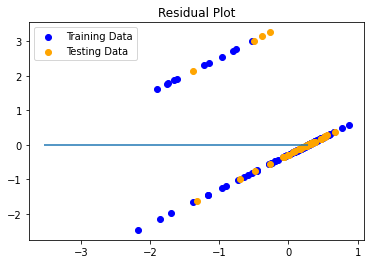

In [94]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

### Linear Regression is not a good model for predicting the outcome because the residuals plot is not random indicating a non-linear relationship of the data.